In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import simpson

In [7]:
x = np.concatenate((np.array([10]), np.linspace(50,830, 14)), axis=0)
x = np.concatenate((x, np.array([870,890,905])), axis = 0)
print(x) #Distance from root rib to point where each forces act on the wing (in mm)
F = np.array([0.2, 0.93, 1.04, 1.09, 1.09, 1.09, 1.08, 1.06, 1.03, 1.005, 0.982, 0.950, 0.890, 0.802, 0.671, 0.183, 0.166, 0.082]) # in N
Area = np.concatenate((np.array([0.004]), np.ones(14)*0.0307), axis=0) 
Area = np.concatenate((Area, np.array([0.0102,0.0102,0.0051])), axis=0) # in m^2
l = np.concatenate((np.array([20]), np.ones(14)*60), axis=0)
l = np.concatenate((l, np.array([20,20,10])),axis=0)/1000
F/l

[ 10.  50. 110. 170. 230. 290. 350. 410. 470. 530. 590. 650. 710. 770.
 830. 870. 890. 905.]


array([10.        , 15.5       , 17.33333333, 18.16666667, 18.16666667,
       18.16666667, 18.        , 17.66666667, 17.16666667, 16.75      ,
       16.36666667, 15.83333333, 14.83333333, 13.36666667, 11.18333333,
        9.15      ,  8.3       ,  8.2       ])

![.](LiftDistrScheme.png)

(8.0, 20.0)

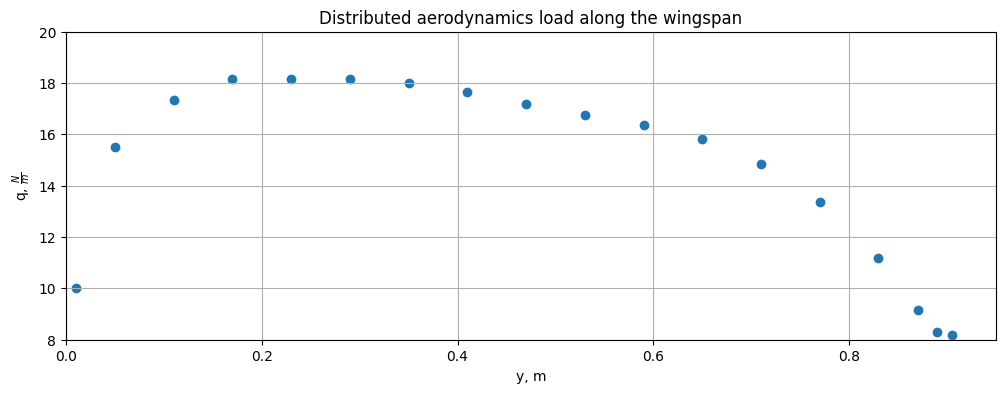

In [8]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
ax.scatter(x/1000, F/l)
ax.set_xlabel('y, m')
ax.set_ylabel(r'q, $\frac{N}{m}$')
ax.set_title("Distributed aerodynamics load along the wingspan")
ax.grid('Major')
ax.set_xlim(0,0.950)
ax.set_ylim(8, 20)
# plt.savefig('DistrLoad.png', dpi=200, bbox_inches = 'tight', pad_inches = 0.1)

-5.0431528862681905

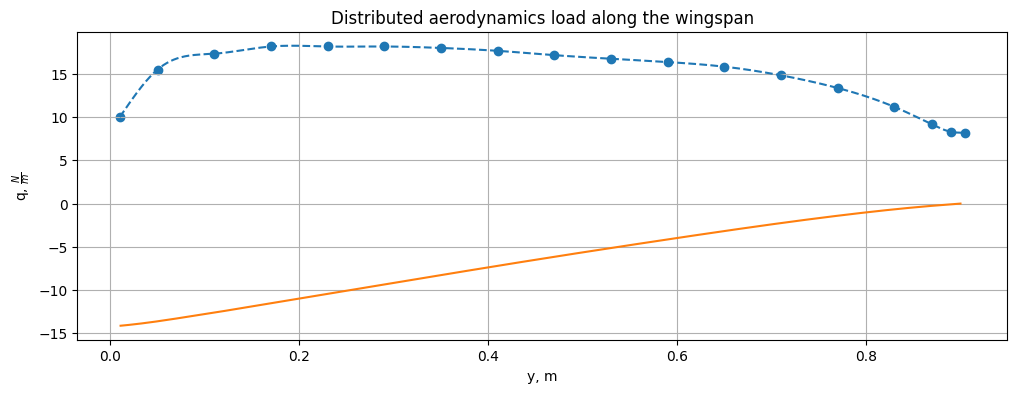

In [9]:
InterpolatedData = np.loadtxt('splineLiftDistr.txt', delimiter=' ')
InterpolatedData
q = InterpolatedData[:, 0]
x1 = InterpolatedData[:, 1]

f_ = interp1d(x1,q,'cubic')

fig, ax = plt.subplots(1,1, figsize=(12,4))
ax.plot(x1,q,'--')
ax.scatter(x/1000, F/l)
# ax.plot(np.linspace(0.01,0.9,100), f_(np.linspace(0.01,0.9,100)), color='orange')
ax.set_xlabel('y, m')
ax.set_ylabel(r'q, $\frac{N}{m}$')
ax.set_title("Distributed aerodynamics load along the wingspan")
ax.grid('Major')
# ax.set_xlim(0,0.95)
# ax.set_ylim(8, 20)

xinv = np.linspace(0.01,0.9,1000).tolist()
xinv.reverse()
I = []
for i in range(1, 1000):
    I.append(simpson(f_(xinv[0:i]), xinv[0:i]))
ax.plot(xinv[:-1], np.array(I))
xinv[409]
I[409]

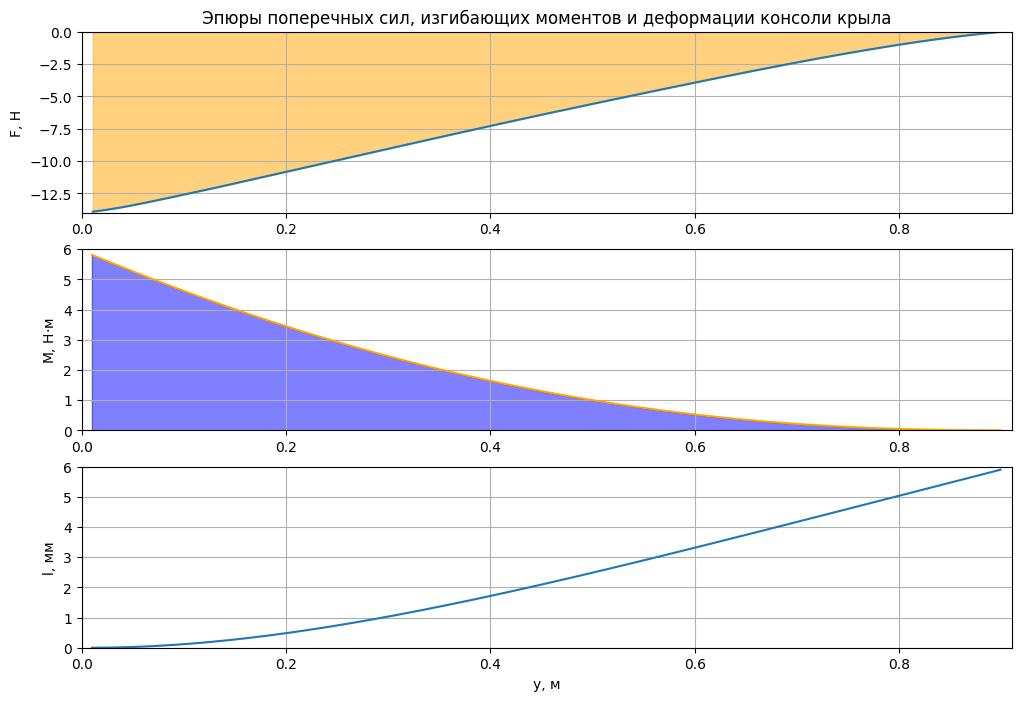

In [10]:
Qa = np.array(I)
q = q.tolist()
q.reverse()
qw = 0.154
q1 = 0.02/0.492
q2 = 0.04/0.35
l = 0.91
x = np.linspace(0.01,0.9,1000).tolist()

Q = []

for i in range(999):
    if (xinv[i] >= 0.535 and xinv[i] <= 0.91):
        Q.append(I[i] - (qw)*(xinv[i] - l))
    elif (xinv[i] >= 0.492 and xinv[i] < 0.535):
        Q.append(I[i] - (qw)*(0.535-l) - (q2+qw)*(xinv[i] - 0.535))
    else:
        Q.append(I[i] - (qw)*(0.535-l) -(q2+qw)*(0.492 - 0.535) - (q1+q2+qw)*(xinv[i] - 0.492))

M = []
for i in range(1, 1000):
    M.append(simpson(Q[0:i], xinv[0:i]))

M1 = []
M.reverse()
m = M
for i in range(1, 1000):
    M1.append(simpson(m[0:i], x[0:i]))

M2 = []
for i in range(1, 1000):
    M2.append(simpson(M1[0:i], x[0:i]))

M1 = np.array(M1)
M2 = np.array(M2)

defl = (M2)/(2.66*10**-9*70*10**9)


fig1, ax1 = plt.subplots(3,1, figsize = (12,8))
ax1 = ax1.ravel()
ax1[0].plot(xinv[:-1], Q)
ax1[0].grid('Major')
ax1[0].set_xlim(0,0.91)
ax1[0].set_ylim(-14, 0)
ax1[0].set_ylabel('F, Н')
ax1[0].fill_between(xinv[:-1], np.zeros(999), Q, color = 'orange', alpha = 0.5)
ax1[0].set_title('Эпюры поперечных сил, изгибающих моментов и деформации консоли крыла')

ax1[1].plot(x[:-1], M, color = 'orange')
ax1[1].grid('Major')
ax1[1].set_xlim(0,0.91)
ax1[1].set_ylim(0, 6)
ax1[1].set_ylabel(r'M, H$\cdot$м')
ax1[1].fill_between(x[:-1], np.zeros(999), M, color = 'blue', alpha = 0.5)

ax1[2].plot(x[:-1], defl*1000)
ax1[2].set_xlabel('y, м')
ax1[2].set_ylabel('l, мм')
ax1[2].set_xlim(0,0.91)
ax1[2].set_ylim(0,6)
ax1[2].grid('Major')
# plt.savefig('ShearForceBendingMoment.png', dpi=300, bbox_inches='tight', pad_inches=0.1)